In [2]:
from gwpy.timeseries import TimeSeriesDict, TimeSeries
import pandas as pd
import sys
import numpy as np

### Coherence plots 

In [3]:
L1_string = 'L1:DCS-CALIB_STRAIN_C01_AR' #strain channel

pem_channels = ['L1:PEM-CS_MAINSMON_EBAY_1_DQ',   
                 'L1:PEM-CS_MAINSMON_EBAY_2_DQ',
                 'L1:PEM-CS_MAINSMON_EBAY_3_DQ',
                 'L1:PEM-CS_MIC_LVEA_INPUTOPTICS_DQ',
                 'L1:PEM-EY_ACC_BEAMTUBE_MAN_Y_DQ',
                 'L1:PEM-EY_MAINSMON_EBAY_1_DQ',
                 'L1:PEM-EY_MIC_VEA_PLUSY_DQ',
                 'L1:PEM-EY_VAULT_MAG_LEMI_X_DQ',
                 'L1:PEM-EY_VAULT_MAG_LEMI_Y_DQ'
]


#Selelct some times from the O3 segments
df = pd.read_csv('../../data/L1-O3a-segments.csv',header=None)
i = 0
t0 = df.iloc[i][0]
t1 = t0 + (10*60)# 10 mins later


#Load the strain data
hoft   = TimeSeries.get(L1_string,start=t0, end=t1,host='losc-nds.ligo.org')


In [5]:
hoft.sample_rate

<Quantity 16384. Hz>

0 L1:PEM-CS_MAINSMON_EBAY_1_DQ


/Users/t1/miniconda3/envs/LIGO_ANC/lib/python3.9/site-packages/gwpy/signal/spectral/_scipy.py:223: UserWarning: Sampling frequencies are unequal. Higher frequency series will be downsampled before coherence is calculated
  warnings.warn("Sampling frequencies are unequal. Higher "


1 L1:PEM-CS_MAINSMON_EBAY_2_DQ
2 L1:PEM-CS_MAINSMON_EBAY_3_DQ
3 L1:PEM-CS_MIC_LVEA_INPUTOPTICS_DQ
4 L1:PEM-EY_ACC_BEAMTUBE_MAN_Y_DQ
5 L1:PEM-EY_MAINSMON_EBAY_1_DQ
6 L1:PEM-EY_MIC_VEA_PLUSY_DQ
7 L1:PEM-EY_VAULT_MAG_LEMI_X_DQ
8 L1:PEM-EY_VAULT_MAG_LEMI_Y_DQ


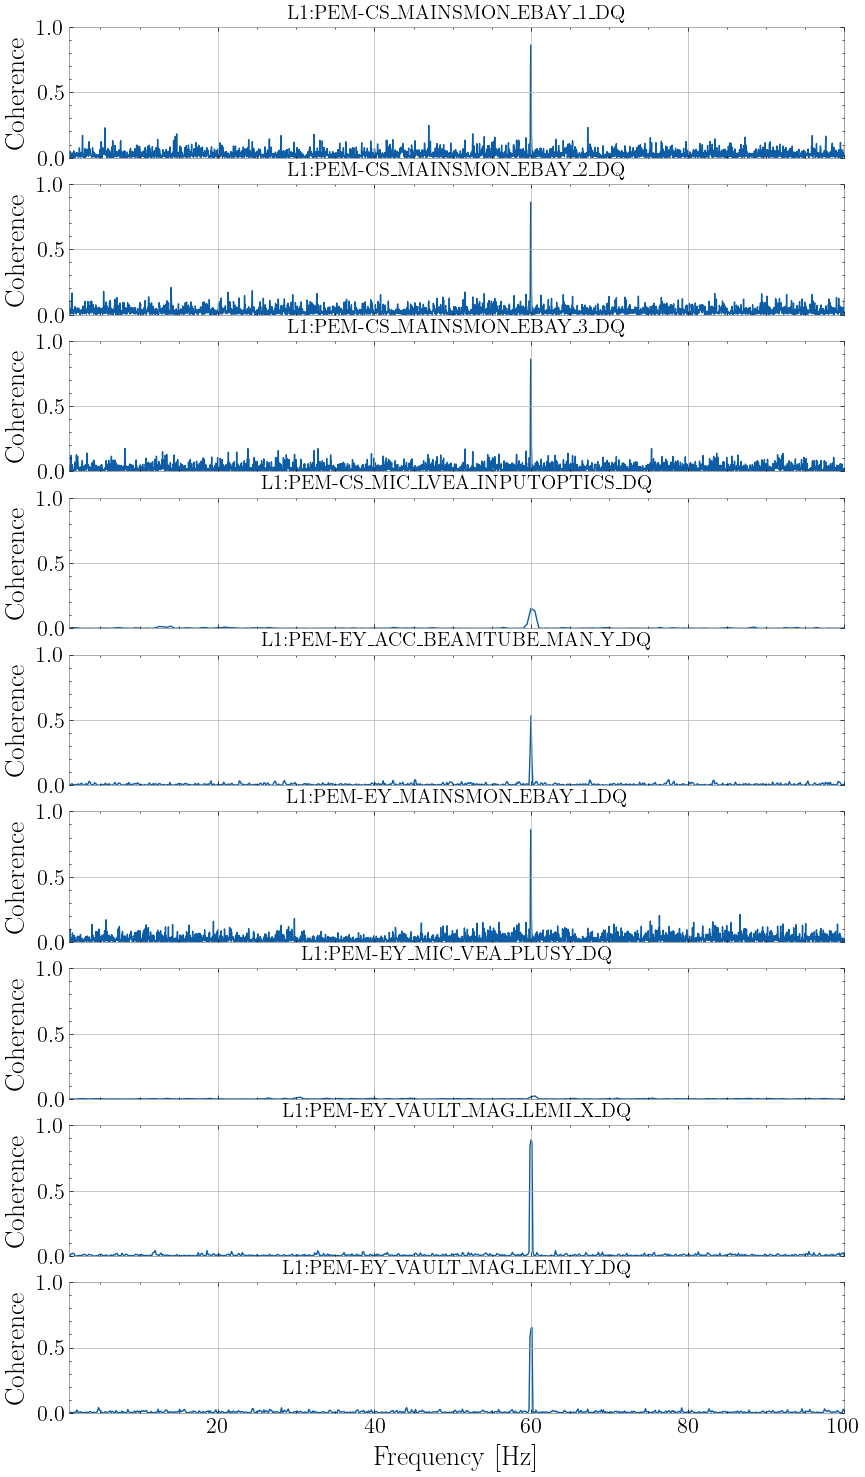

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt 
import scienceplots
plt.style.use('science')

num_pem_channels = len(pem_channels)
fig, axes = plt.subplots(nrows=num_pem_channels, ncols=1, figsize=(10,18),sharex=True)

#Load the pem data and get the coherence w.r.t the strain channel

fs = 20
for i in range(num_pem_channels):


    pem = pem_channels[i]
    print(i, pem)
    #acc   = TimeSeries.get(pem,start=t0, end=t1,host='losc-nds.ligo.org')

    #Load the pem channel from disk
    acc = TimeSeries.read(f'../../data/pem_channels/{pem}.txt')

    
    #Coherence
    coh = hoft.coherence(acc, fftlength=2, overlap=1)


    coherence_frequencies = np.array(coh.frequencies)
    coherence_values = np.array(coh)


    ax = axes[i]

    ax.plot(coherence_frequencies,coherence_values)


    ax.set_xlim(1, 100)
    ax.set_ylim(0, 1)

    ax.set_ylabel(r'Coherence',fontsize=fs)
    ax.axes.tick_params(axis="both", labelsize=fs-4)
    ax.set_title(pem)


    #ax.set_yscale('log')


axes[-1].set_xlabel(r'Frequency [Hz]',fontsize=fs)
fname='stacked_coherence_plot'
plt.savefig(f'../../data/images/{fname}',bbox_inches='tight',dpi=300)



0 L1:PEM-CS_MAINSMON_EBAY_1_DQ
1 L1:PEM-CS_MAINSMON_EBAY_2_DQ
2 L1:PEM-CS_MAINSMON_EBAY_3_DQ
3 L1:PEM-CS_MIC_LVEA_INPUTOPTICS_DQ
4 L1:PEM-EY_ACC_BEAMTUBE_MAN_Y_DQ
5 L1:PEM-EY_MAINSMON_EBAY_1_DQ
6 L1:PEM-EY_MIC_VEA_PLUSY_DQ
7 L1:PEM-EY_VAULT_MAG_LEMI_X_DQ
8 L1:PEM-EY_VAULT_MAG_LEMI_Y_DQ


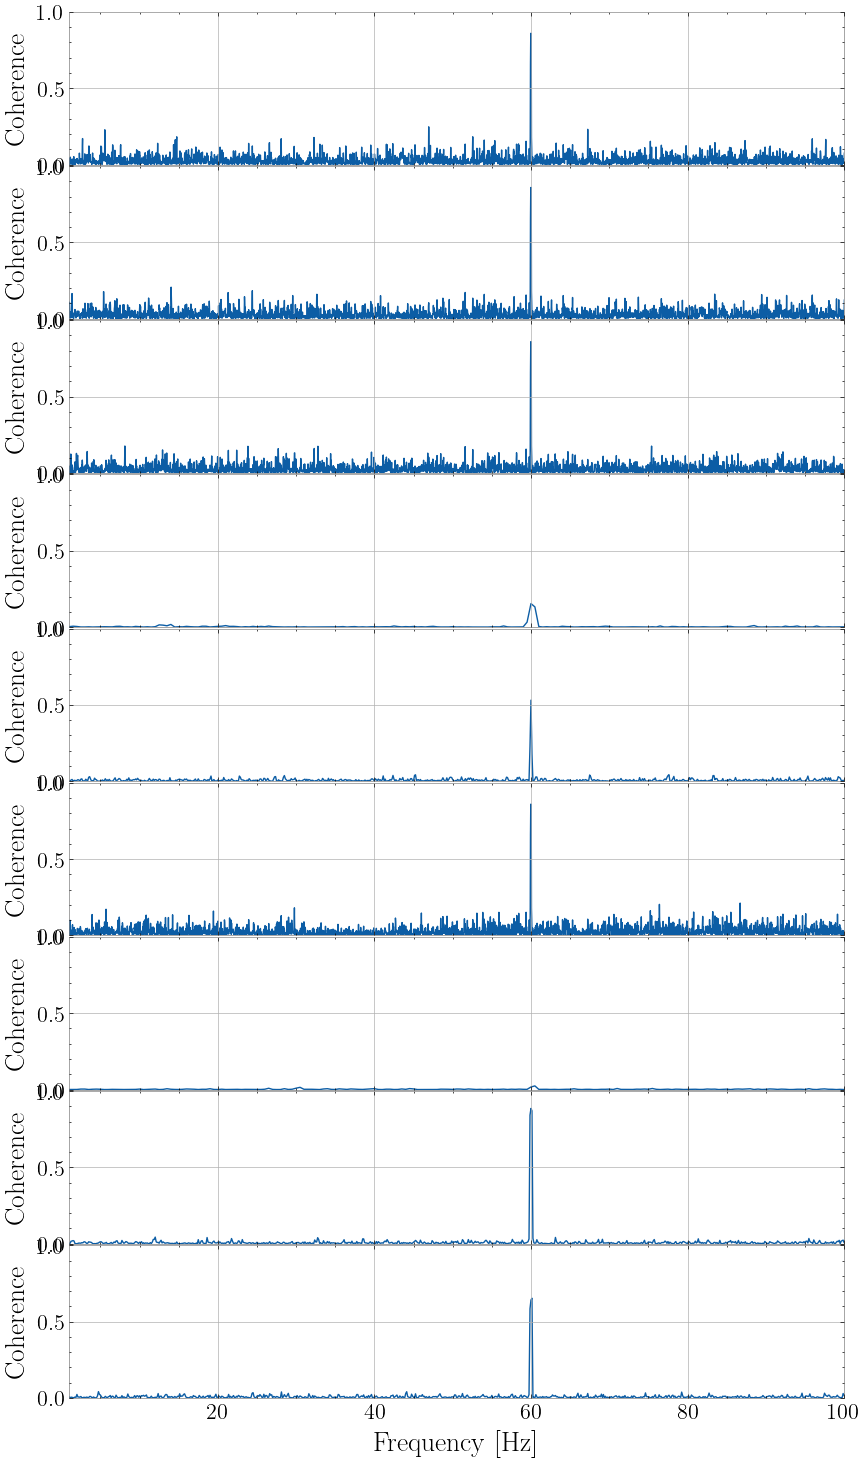

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt 
import scienceplots
plt.style.use('science')

num_pem_channels = len(pem_channels)
fig, axes = plt.subplots(nrows=num_pem_channels, ncols=1, figsize=(10,18),sharex=True)

#Load the pem data and get the coherence w.r.t the strain channel

fs = 20
for i in range(num_pem_channels):


    pem = pem_channels[i]
    print(i, pem)
    #acc   = TimeSeries.get(pem,start=t0, end=t1,host='losc-nds.ligo.org')

    #Load the pem channel from disk
    acc = TimeSeries.read(f'../../data/pem_channels/{pem}.txt')

    
    #Coherence
    coh = hoft.coherence(acc, fftlength=2, overlap=1)


    coherence_frequencies = np.array(coh.frequencies)
    coherence_values = np.array(coh)


    ax = axes[i]

    ax.plot(coherence_frequencies,coherence_values)


    ax.set_xlim(1, 100)
    ax.set_ylim(0, 1)

    ax.set_ylabel(r'Coherence',fontsize=fs)
    ax.axes.tick_params(axis="both", labelsize=fs-4)
    #ax.set_title(pem)


    #ax.set_yscale('log')


plt.subplots_adjust(wspace=0.1,hspace=0.01)
axes[-1].set_xlabel(r'Frequency [Hz]',fontsize=fs)
fname='stacked_coherence_plot_notitles'
plt.savefig(f'../../data/images/{fname}',bbox_inches='tight',dpi=300)



0 L1:PEM-CS_MAINSMON_EBAY_1_DQ


/Users/t1/miniconda3/envs/LIGO_ANC/lib/python3.9/site-packages/gwpy/signal/spectral/_scipy.py:223: UserWarning: Sampling frequencies are unequal. Higher frequency series will be downsampled before coherence is calculated
  warnings.warn("Sampling frequencies are unequal. Higher "


1 L1:PEM-CS_MAINSMON_EBAY_2_DQ
2 L1:PEM-CS_MAINSMON_EBAY_3_DQ
3 L1:PEM-CS_MIC_LVEA_INPUTOPTICS_DQ
4 L1:PEM-EY_ACC_BEAMTUBE_MAN_Y_DQ
5 L1:PEM-EY_MAINSMON_EBAY_1_DQ
6 L1:PEM-EY_MIC_VEA_PLUSY_DQ
7 L1:PEM-EY_VAULT_MAG_LEMI_X_DQ
8 L1:PEM-EY_VAULT_MAG_LEMI_Y_DQ


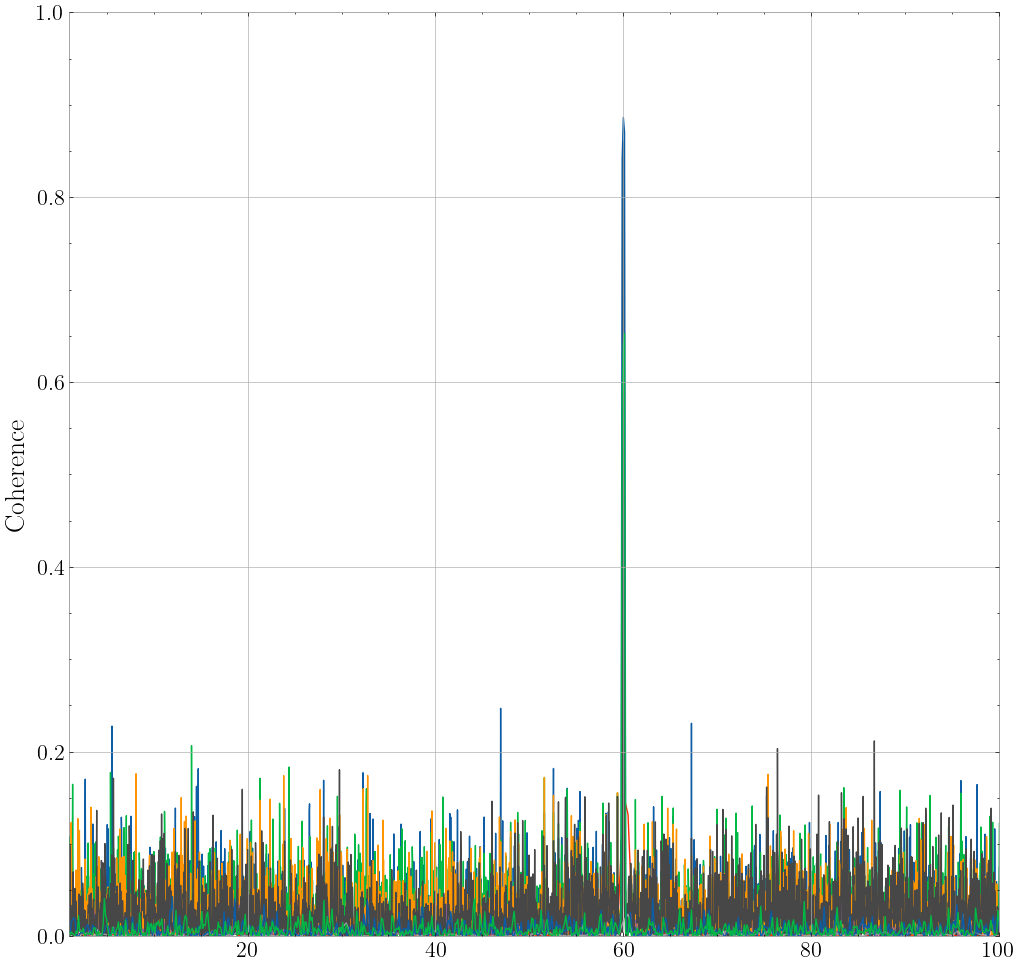

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt 
import scienceplots
plt.style.use('science')


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12),sharex=True)

#Load the pem data and get the coherence w.r.t the strain channel

fs = 20
for i in range(num_pem_channels):


    pem = pem_channels[i]
    print(i, pem)
    #acc   = TimeSeries.get(pem,start=t0, end=t1,host='losc-nds.ligo.org')

    #Load the pem channel from disk
    acc = TimeSeries.read(f'../../data/pem_channels/{pem}.txt')

    
    #Coherence
    coh = hoft.coherence(acc, fftlength=2, overlap=1)


    coherence_frequencies = np.array(coh.frequencies)
    coherence_values = np.array(coh)


    ax.plot(coherence_frequencies,coherence_values,label=pem)


ax.set_xlim(1, 100)
ax.set_ylim(0, 1)

ax.set_ylabel(r'Coherence',fontsize=fs)
ax.axes.tick_params(axis="both", labelsize=fs-4)
    


    #ax.set_yscale('log')


#axes[-1].set_xlabel(r'Frequency [Hz]',fontsize=fs)



# Cross correlation

Rather than coherence, we can plot the cross correlation as a function of lag

In [69]:
whiten = False

In [70]:
#Whiten the data
if whiten:
    whoft = hoft.whiten()
else:
    whoft = hoft 



0 L1:PEM-CS_MAINSMON_EBAY_1_DQ
1 L1:PEM-CS_MAINSMON_EBAY_2_DQ
2 L1:PEM-CS_MAINSMON_EBAY_3_DQ
3 L1:PEM-CS_MIC_LVEA_INPUTOPTICS_DQ


/Users/t1/miniconda3/envs/LIGO_ANC/lib/python3.9/site-packages/gwpy/timeseries/timeseries.py:930: UserWarning: resample() rate matches current sample_rate (16384.0 Hz), returning input data unmodified; please double-check your parameters
  warnings.warn(


4 L1:PEM-EY_ACC_BEAMTUBE_MAN_Y_DQ
5 L1:PEM-EY_MAINSMON_EBAY_1_DQ
6 L1:PEM-EY_MIC_VEA_PLUSY_DQ
7 L1:PEM-EY_VAULT_MAG_LEMI_X_DQ
8 L1:PEM-EY_VAULT_MAG_LEMI_Y_DQ


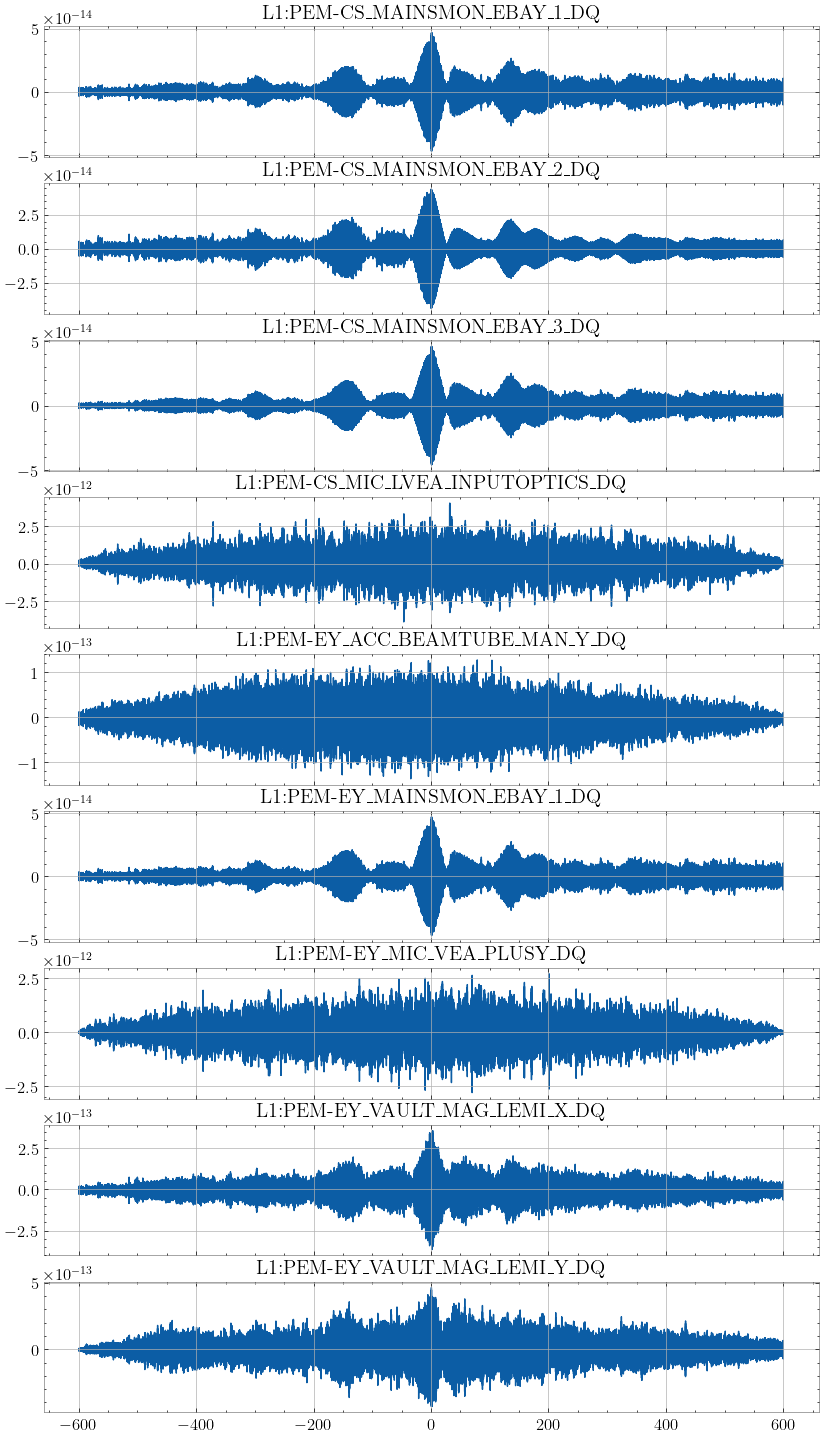

In [72]:
from scipy import signal

num_pem_channels = len(pem_channels)
fig, axes = plt.subplots(nrows=num_pem_channels, ncols=1, figsize=(10,18),sharex=True)

#Load the pem data and get the coherence w.r.t the strain channel

fs = 20
for i in range(num_pem_channels):


    pem = pem_channels[i]
    print(i, pem)
    #acc   = TimeSeries.get(pem,start=t0, end=t1,host='losc-nds.ligo.org')

    #Load the pem channel from disk
    acc = TimeSeries.read(f'../../data/pem_channels/{pem}.txt')


    if whiten:
        wacc = acc.whiten()
    else:
        wacc = acc 


    #Downsample strain to match PEM
    assert whoft.sample_rate > wacc.sample_rate or whoft.sample_rate == wacc.sample_rate 
    whoft_rs = whoft.resample(wacc.sample_rate)
    

    #Make it a numpy array and save the sampling rate
    dt = whoft_rs.dt
    t = np.arange(len(whoft_rs)) * dt
    
    
    x1 = np.array(whoft_rs)
    x2 = np.array(wacc)

    #Cross correlate using scipy


    correlation_mode = "full"
    cross_correlation= signal.correlate(x1,x2,mode=correlation_mode) # mode can be ``full`, `valid` or `same`. Looks like GWpy uses `same`
    lags = signal.correlation_lags(len(x1), len(x2),mode=correlation_mode) * dt #time sampling is constant


    ax = axes[i]
    ax.plot(lags,cross_correlation)


    ax.set_title(pem)
   





# Coherence spectrogram 

0 L1:PEM-CS_MAINSMON_EBAY_1_DQ
0.1
Saving figure at:  ../../data/manuscript_images/coherence_spectrogram_L1:PEM-CS_MAINSMON_EBAY_1_DQ.png
1 L1:PEM-CS_MAINSMON_EBAY_2_DQ
0.1
Saving figure at:  ../../data/manuscript_images/coherence_spectrogram_L1:PEM-CS_MAINSMON_EBAY_2_DQ.png
2 L1:PEM-CS_MAINSMON_EBAY_3_DQ
0.1
Saving figure at:  ../../data/manuscript_images/coherence_spectrogram_L1:PEM-CS_MAINSMON_EBAY_3_DQ.png
3 L1:PEM-CS_MIC_LVEA_INPUTOPTICS_DQ
0.1
Saving figure at:  ../../data/manuscript_images/coherence_spectrogram_L1:PEM-CS_MIC_LVEA_INPUTOPTICS_DQ.png
4 L1:PEM-EY_ACC_BEAMTUBE_MAN_Y_DQ
0.1
Saving figure at:  ../../data/manuscript_images/coherence_spectrogram_L1:PEM-EY_ACC_BEAMTUBE_MAN_Y_DQ.png
5 L1:PEM-EY_MAINSMON_EBAY_1_DQ
0.1
Saving figure at:  ../../data/manuscript_images/coherence_spectrogram_L1:PEM-EY_MAINSMON_EBAY_1_DQ.png
6 L1:PEM-EY_MIC_VEA_PLUSY_DQ
0.1
Saving figure at:  ../../data/manuscript_images/coherence_spectrogram_L1:PEM-EY_MIC_VEA_PLUSY_DQ.png
7 L1:PEM-EY_VAULT_MAG_

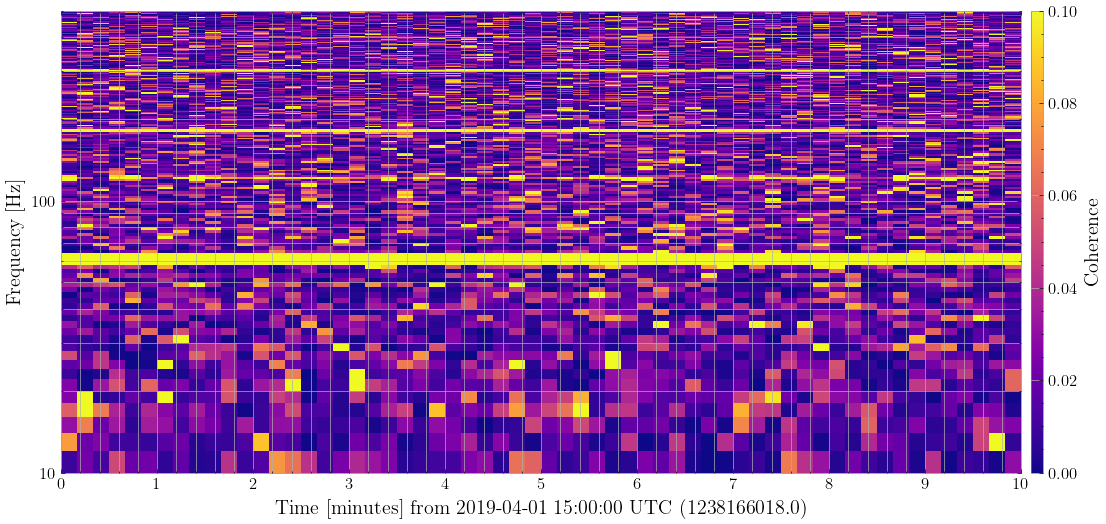

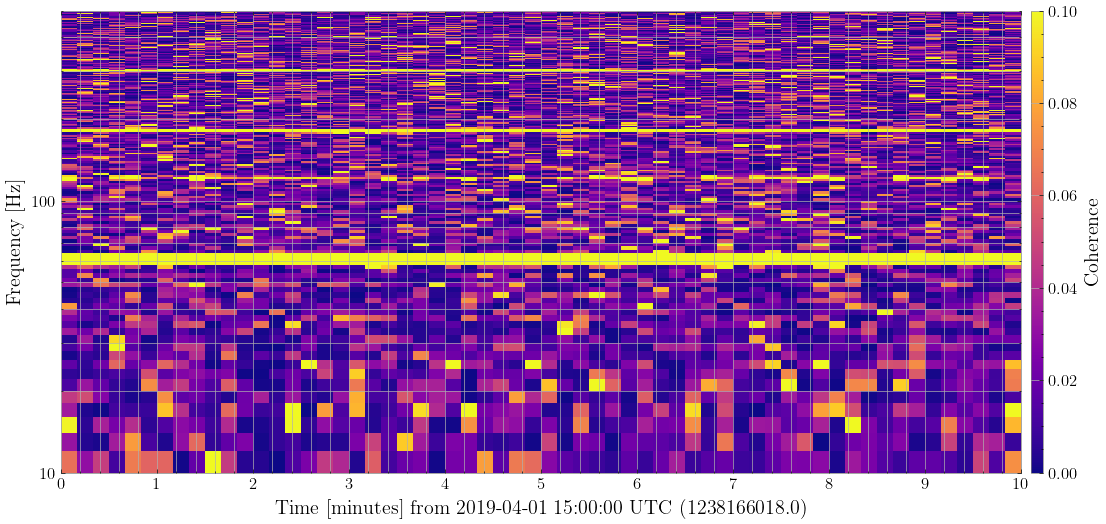

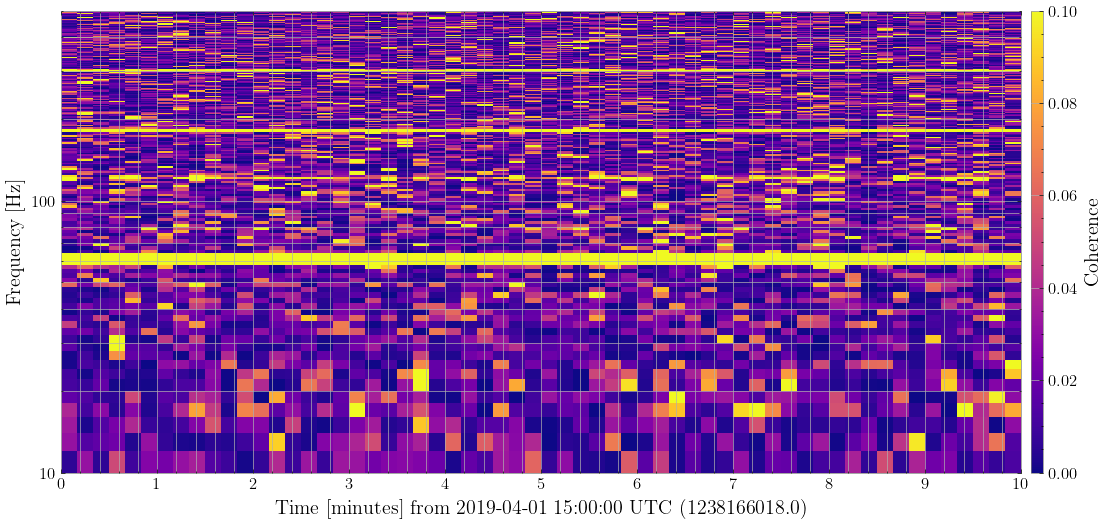

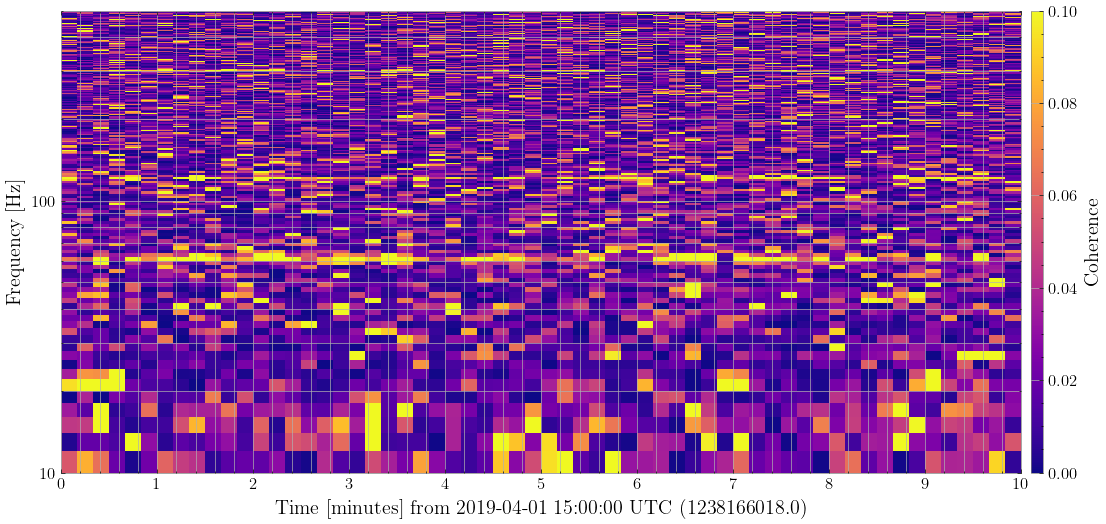

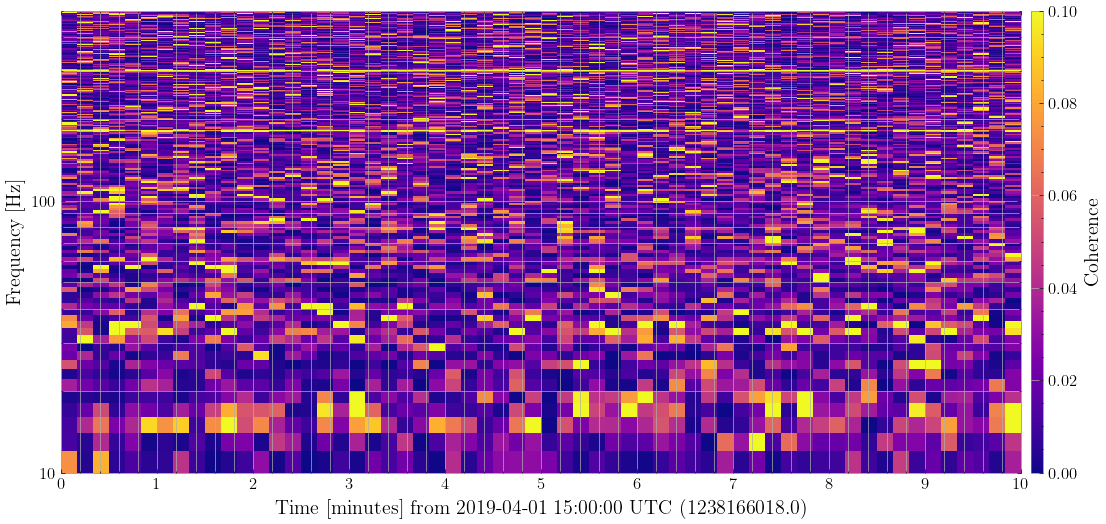

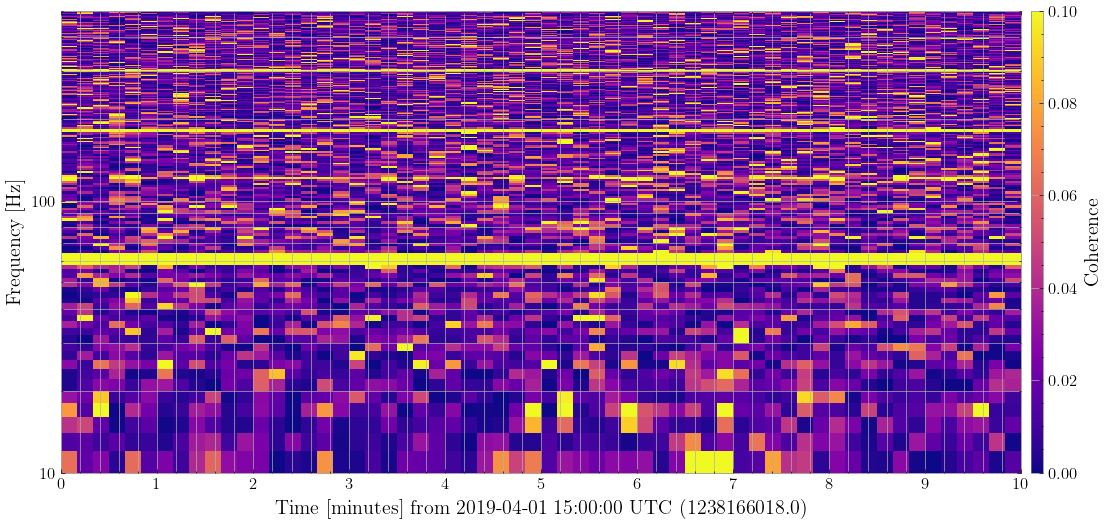

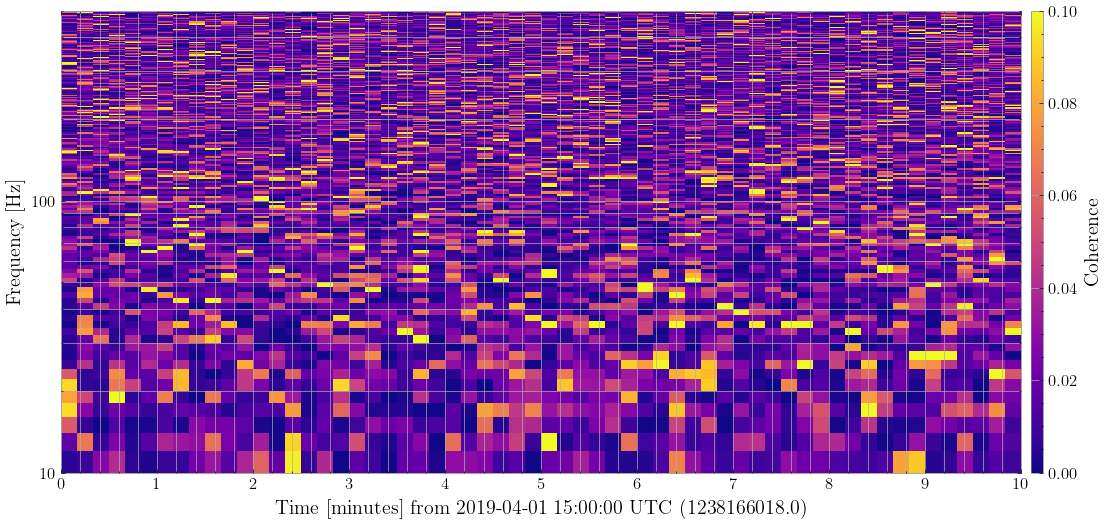

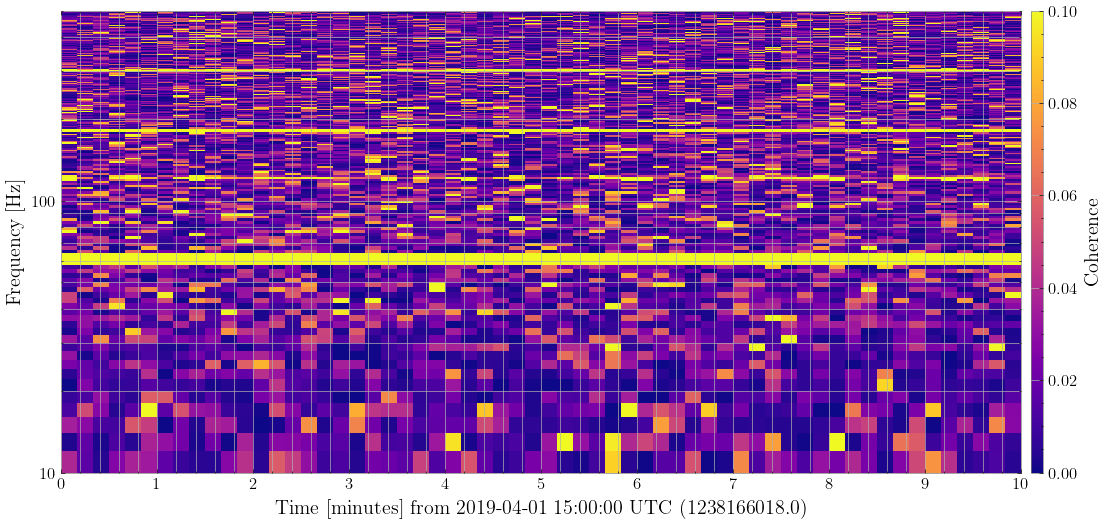

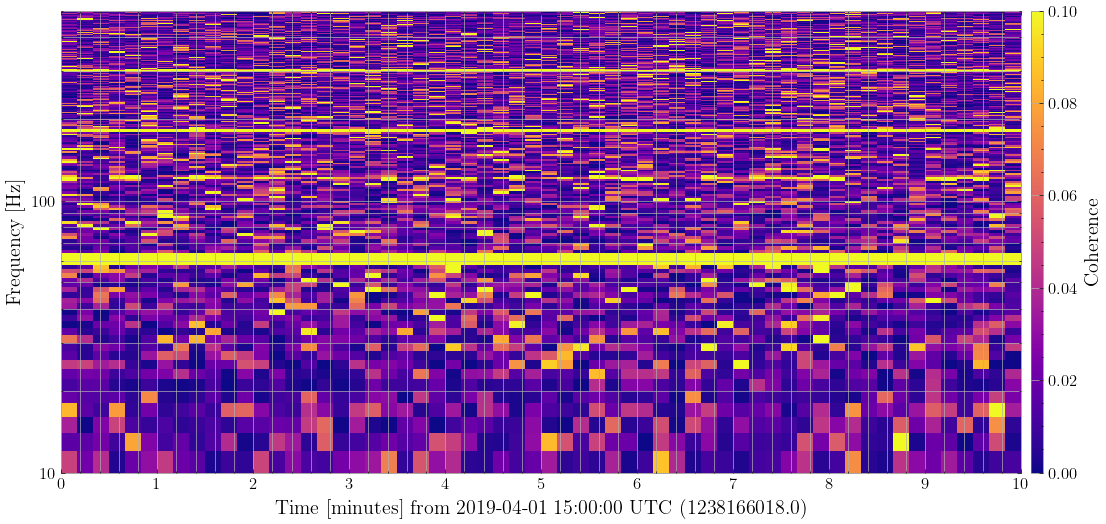

In [81]:
import matplotlib.pyplot as plt 
import scienceplots
plt.style.use('science')


for i in range(num_pem_channels):


    pem = pem_channels[i]
    print(i, pem)
   
    #Load the pem channel from disk
    acc = TimeSeries.read(f'../../data/pem_channels/{pem}.txt')




    coh = hoft.coherence_spectrogram(acc, 10, fftlength=.5, overlap=.25)



    #upper_f_limit = coh.yindex.max().value
    upper_f_limit = 500



    plot = coh.plot()
    ax = plot.gca()
    ax.set_ylabel('Frequency [Hz]')
    ax.set_yscale('log')
    ax.set_ylim(10, upper_f_limit)

    ax.grid(True, 'both', 'both')
    coherence_upper_limit = 0.10 #coh.max().value
    print(coherence_upper_limit)
    ax.colorbar(label='Coherence', clim=[0, coherence_upper_limit], cmap='plasma')


    #plot.show()
    savepath = f'../../data/manuscript_images/coherence_spectrogram_{pem}.png'
    print("Saving figure at: ", savepath)
    plot.savefig(savepath,bbox_inches='tight',dpi=300)



In [79]:
coh.max().value

0.9401855446556163